<a href="https://colab.research.google.com/github/avilashsrivastava/Customer-Segmentation/blob/main/Individual_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Introduction**

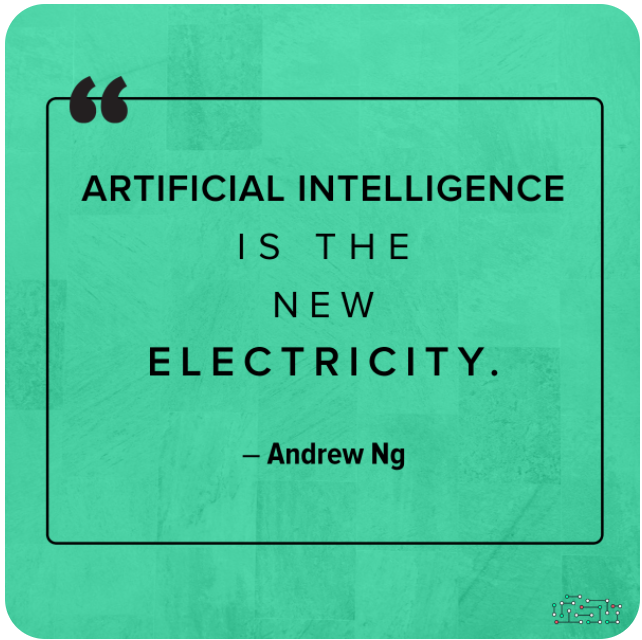

Machine Learning is evolving at a great pace more than ever. There are basically 3 types of machine learning namely; Supervised machine learning, unsupervised machine learning and reinforcement learning. In supervised ml, we have a target variable to predict given both the independent and target variable. Reinforcement learning has the concept of agent and reward.

Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. Its ability to discover similarities and differences in information make it the ideal solution for exploratory data analysis, cross-selling strategies, customer segmentation, and image recognition.

In this exercise I am going to implement as unseupervised machine learning on customer segmentation. I will try my best to provide a thorough analysis but theres always a scope of better version. The contents of the notebook include:

1. **Data Wrangling -** In this section we will try to remove any defects from our dataset and also perform feature modifications.

2. **EDA -** In this section we will try to analyse our features and find out their distributions, counts, relations etc.

3. **RFM model -** In this section we will implement a simple rfm model.

4. **ML algorithms -** In this section we will implement unsupervised machine leraning algorithms to rfm model.

5. **Conclusion -** Finally we will point down our observations from the analysis.

Lets begin!

In [ ]:
#importing libraries that would help us in our endeavour
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score


# to not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the big guy
directory_path='/content/drive/MyDrive/Almabetter/Customer Segmentation - Avilash Srivastava/'
customer_df=pd.read_excel(directory_path+'Online Retail.xlsx')

# Note : Please change the directory path of the file while running in different systems

In [ ]:
# lets have a initial look at the data
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#tail part
customer_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# lets check the no of rows we have
print('The no. of rows in the dataset are = ',len(customer_df))

The no. of rows in the dataset are =  541909


In [ ]:
# lets see the columns we have
print('The no. of columns in the dataset are = ',len(customer_df.columns.to_list()))
print(customer_df.columns.to_list())

The no. of columns in the dataset are =  8
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
# lets see the info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


It looks like we have datatypes of intergers, floats, strings and datetime. Also there is some difference in non null count in description and customer id.

### **Understanding problem statement**

Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.

Since the marketer’s goal is usually to maximize the value (revenue and/or profit) from each customer, it is critical to know in advance how any particular marketing action will influence the customer. Ideally, such “action-centric” customer segmentation will not focus on the short-term value of a marketing action, but rather the long-term customer lifetime value (CLV) impact that such a marketing action will have. Thus, it is necessary to group, or segment, customers according to their CLV.

Of course, it is always easier to make assumptions and use “gut feelings” to define rules which will segment customers into logical groupings, e.g., customers who came from a particular source, who live in a particular location or who bought a particular product/service. However, these high-level categorizations will seldom lead to the desired results.

It is obvious that some customers will spend more than others during their relationship with a company. The best customers will spend a lot for many years. Good customers will spend modestly over a long period of time, or will spend a lot over a short period of time. Others won’t spend too much and/or won’t stick around too long.

The right approach to segmentation analysis is to segment customers into groups based on predictions regarding their total future value to the company, with the goal of addressing each group (or individual) in the way most likely to maximize that future, or lifetime, value.

The data we have in hand has the following features:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

Now that we know a liitle bit about the problem and the data let us ask ourselves some questions. Shall we?

1. Does invoice no. has anything to do with segmentation?

2. Does description of a product would help?

3. How much the unit prices and quntity will impact the segmentation?

4. Will we see a hidden pattern in customers location?

5. Will time affect our segmentation?

Let us dwelve deeper and try to find the answers of these questions and much more. Finally we will achieve our goal of segementing customers in various groups.

Lets do it!

# **1. Data Wrangling**

In this section we will check the integrity of the data and try to remove any defects from the dataset such as checking for null values and outliers. We will also modify some features according to our analysis.

### **Null values**

In [ ]:
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(customer_df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(customer_df.isnull().sum()).T.rename(index={0:'null values '}))
tab_info=tab_info.append(pd.DataFrame(customer_df.isnull().sum()/customer_df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
tab_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values,0,0,1454,0,0,0,135080,0
null values (%),0,0,0.268311,0,0,0,24.9267,0


It looks like we have null values in description and customer ids around 25%. Since we are segmenting on customers and customer ids are unique and thus cannot be replaced. Therefore it would be better to drop these rows.

In [ ]:
# removing all null values
customer_df.dropna(inplace=True)
customer_df.reset_index(inplace=True)

In [ ]:
# checking null values
customer_df.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# checking the shape
customer_df.shape

(406829, 9)

Great! No null values and our rows have been reduced from 541909 to 406829.

### **Checking duplicates**

In [ ]:
# checking duplicated rows
print('The no. of duplicates we have = ',len(customer_df[customer_df.duplicated()]))

The no. of duplicates we have =  0


It looks like we have around 5225 duplicated records. We will remove them because obviously we dont need them.

In [ ]:
# removing duplicates
customer_df.drop_duplicates(inplace=True,ignore_index=True)

In [ ]:
# checking duplicated rows again
print('The no. of duplicates after removal we have = ',len(customer_df[customer_df.duplicated()]))

The no. of duplicates after removal we have =  0


In [ ]:
# checking the shape
customer_df.shape

(406829, 9)

No. of rows has reduced from 406829 to 401604.

### **cleaning InvoiceNo.**

In [ ]:
# converting invoice no to string type
customer_df['InvoiceNo']=customer_df['InvoiceNo'].astype('str')

In [ ]:
# checking invoice no.
customer_df[customer_df['InvoiceNo'].str.contains('C')]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
406377,540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
406461,541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
406635,541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
406636,541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


We have some observations in invoiceno. that starts with 'C' which means the order was cancelled. We will remove them as cancelled orders doesnot count towards any monetory gain. We have around 8872 such observations.

In [ ]:
# removing cancelled orders
customer_df=customer_df[~customer_df['InvoiceNo'].str.contains('C')]
customer_df.reset_index(inplace=True)

In [ ]:
# checking the no of rows
print('The no. of rows in the dataset are = ',len(customer_df))

The no. of rows in the dataset are =  397924


The rows in the dataset have reduced from 401604 to 392732.

In [ ]:
# removing extra columns
customer_df.drop(columns=['index','level_0'],inplace=True)

### **checking outliers**

We have only two numerical type variables such as quantity and unit price that can be used for numerical analysis. Lets see their descriptive stats.

In [ ]:
# checking descriptive stats of quantity and unit price
customer_df[['Quantity','UnitPrice']].describe([0.99])

,Quantity,UnitPrice
count,397924.000000,397924.000000
mean,13.021823,3.116174
std,180.420210,22.096788
min,1.000000,0.000000
50%,6.000000,1.950000
99%,120.000000,14.950000
max,80995.000000,8142.750000


Looking at the descriptive stats we can say around 99% values are in a proper range and maximum values are very large. These are considered to be outliers. Since this is a grouping exercise we dont have to be worried for outliers as of now because these outliers will form a part of group.

### **splitting invoice date**

In this part we will try to split the invoice date column which is of type datetime into days, years, months, hours, minutes. This will help us to clearly visualize any pattern related to time of an order made by customers.

In [ ]:
# creating new features from invoice date
customer_df['Day']=customer_df['InvoiceDate'].dt.day_name()
customer_df['Month']=customer_df['InvoiceDate'].dt.month_name()
customer_df["year"] = customer_df["InvoiceDate"].apply(lambda x: x.year)
customer_df["month_num"] = customer_df["InvoiceDate"].apply(lambda x: x.month)
customer_df["day_num"] = customer_df["InvoiceDate"].apply(lambda x: x.day)
customer_df["hour"] = customer_df["InvoiceDate"].apply(lambda x: x.hour)
customer_df["minute"] = customer_df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
# checking the transformed data
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26


### **combining quantity and price**

We have variables such as quantity and unit price. We will combine both to form a new column that would give the total amount spent on that item. Finally we will change the data type of customer id to string as they are unique and doesnot have any numerical analysis.

In [ ]:
# creating total amount column
customer_df['TotalAmount']=customer_df['Quantity']*customer_df['UnitPrice']

In [ ]:
# changing dtype of cutomer id
customer_df['CustomerID']=customer_df['CustomerID'].astype('str')

In [ ]:
# checking the final df
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,year,month_num,day_num,hour,minute,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34


# **2. Exploratory Data Analysis**

Exploratory data analysis aka EDA may sound fancy but is one of the most important step before we build a model. It tells us everything about the variables, their nature, structure, distribution, effects, importance, relationship with other variables and much more.

Let us now try to do eda on each variables we have.

### **First thing first - The customers**

We have a certain amount of rows. Let us check if each row has a single customer or not. If not than how many customer ids we have.

In [ ]:
# let us see the unique ids of customers
print('The no. of customers = ',customer_df['CustomerID'].nunique())

The no. of customers =  4339


So we have around 392732 rows but only 4339 cuatomers. Let us now see who is most active customer.

In [ ]:
# finding most active customer
active_customers=pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers

,CustomerID,Count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700
...,...,...
4334,13302.0,1
4335,15389.0,1
4336,17747.0,1
4337,16881.0,1


In [ ]:
# top 5
active_customers.head()

,CustomerID,Count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700


Text(0, 0.5, 'Count')

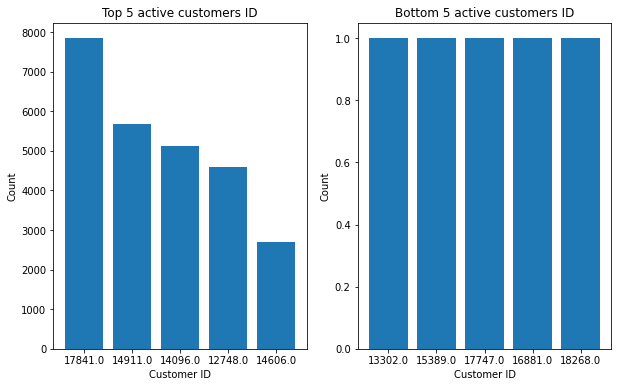

In [ ]:
# visulizing
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.bar(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

The top 5 most active cutomers that have been regularly purchaging are having ids 17841, 14911, 14096, 12748, 14606. These customers can be considered as special customeres because it is very likely that they would buy again more often.

### **Country**

Let us now find the country from where most orders are made.

In [ ]:
# finding the no of countries we have
print('The no. of countries in dataframe = ',customer_df['Country'].nunique())
print('They are : ',customer_df['Country'].unique())

The no. of countries in dataframe =  37
They are :  ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [ ]:
# finding count of countries
customer_df['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

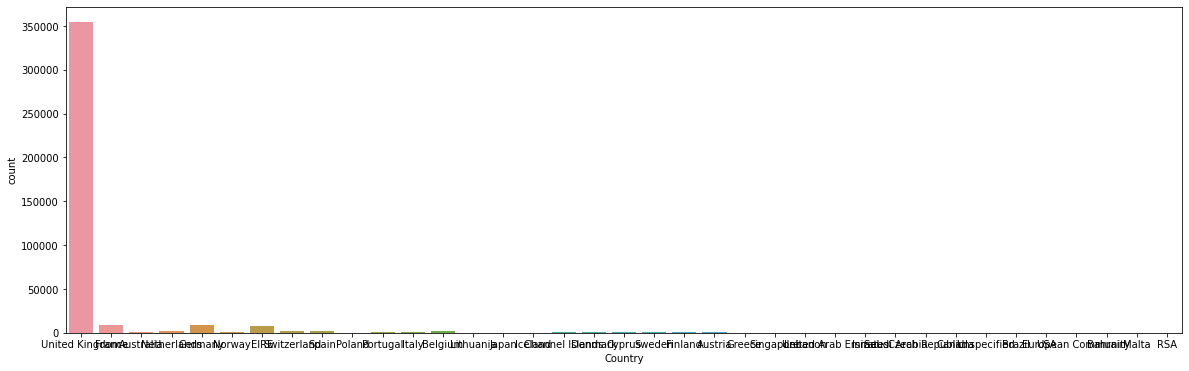

In [ ]:
# visualizing it
plt.figure(figsize=(20,6))
sns.countplot(customer_df['Country'])

In [ ]:
# top 5 countries
country_df=customer_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [ ]:
# bottom 5 countries
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


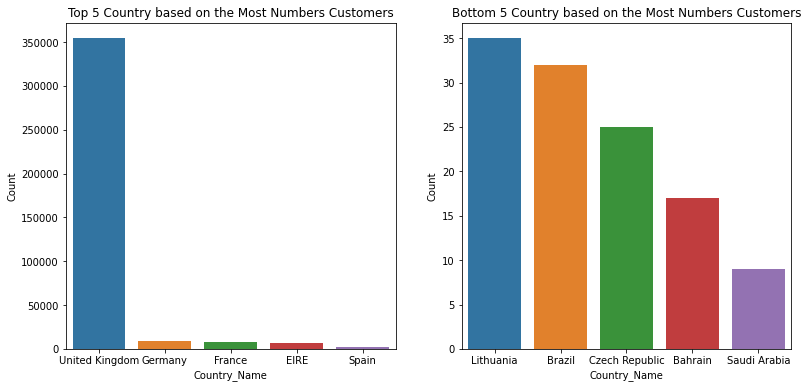

In [ ]:
# visualizing top and bottom countries
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])
plt.subplot(1,2,2)
plt.title('Bottom 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

We can observe the top 5 countries are UK, Germany, France, EIRE, Spain. Since the company is based and registered in UK, we can see most orders are from United Kingdom.

### **Description and stockcode**

Let us now see the top selling products both by count and quantity. Since each description have a unique stock code the results of top 5 products would be same in both cases. 

In [ ]:
# finding no. of products
print('The no. of products = ',customer_df['Description'].nunique())

The no. of products =  3877


In [ ]:
# top selling products by count
product=customer_df[['StockCode','Description']].groupby(['StockCode'])['Description'].value_counts().sort_values(ascending=False)
product

StockCode  Description                        
85123A     WHITE HANGING HEART T-LIGHT HOLDER     2028
22423      REGENCY CAKESTAND 3 TIER               1724
85099B     JUMBO BAG RED RETROSPOT                1618
84879      ASSORTED COLOUR BIRD ORNAMENT          1408
47566      PARTY BUNTING                          1397
                                                  ... 
90084      PINK CRYSTAL GUITAR PHONE CHARM           1
90078      PINK/WHITE GLASS DEMI CHOKER              1
90165B     WHITE ROSEBUD  PEARL EARRINGS             1
20892      SET/3 TALL GLASS CANDLE HOLDER PINK       1
22963      JAM JAR WITH BLUE LID                     1
Name: Description, Length: 3897, dtype: int64

In [ ]:
# top 5 selling products wrt count
print('The top 5 selling product wrt to count: ')
print('----------------------------------------------')
print(product[:5])

The top 5 selling product wrt to count: 
----------------------------------------------
StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2028
22423      REGENCY CAKESTAND 3 TIER              1724
85099B     JUMBO BAG RED RETROSPOT               1618
84879      ASSORTED COLOUR BIRD ORNAMENT         1408
47566      PARTY BUNTING                         1397
Name: Description, dtype: int64


In [ ]:
# bottom 5 selling products wrt count
print('The bottom 5 selling product wrt to count: ')
print('----------------------------------------------')
print(product[-5:])

The bottom 5 selling product wrt to count: 
----------------------------------------------
StockCode  Description                        
90084      PINK CRYSTAL GUITAR PHONE CHARM        1
90078      PINK/WHITE GLASS DEMI CHOKER           1
90165B     WHITE ROSEBUD  PEARL EARRINGS          1
20892      SET/3 TALL GLASS CANDLE HOLDER PINK    1
22963      JAM JAR WITH BLUE LID                  1
Name: Description, dtype: int64


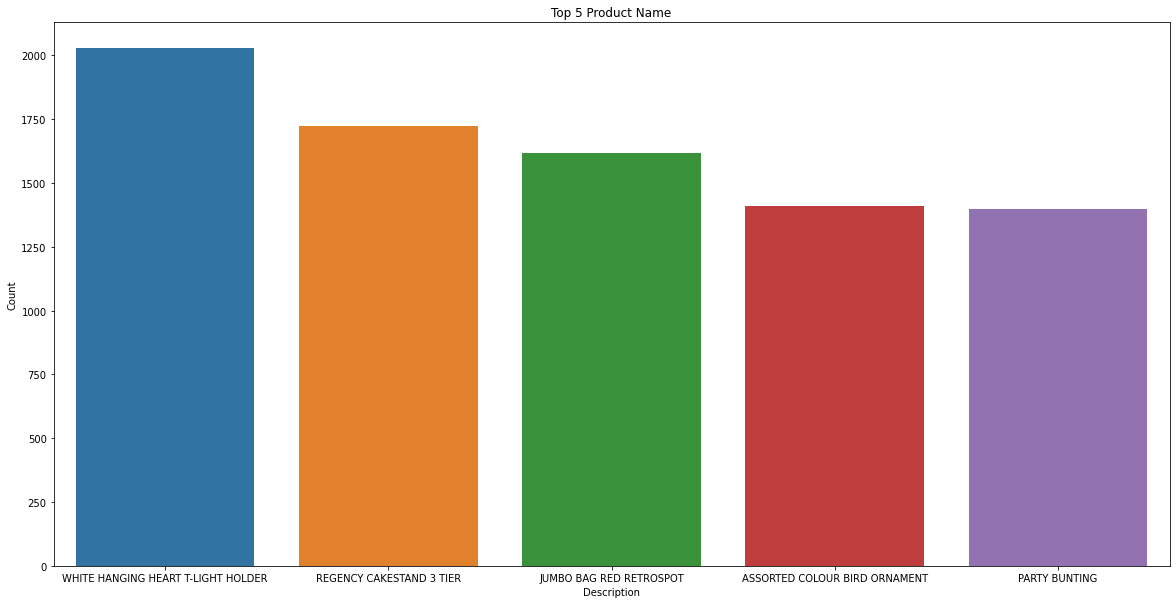

In [ ]:
# visualizing
Description_df=customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description','Description': 'Count'}, inplace=True)
plt.figure(figsize=(20,10))
plt.title('Top 5 Product Name')
sns.barplot(x='Description',y='Count',data=Description_df[:5])

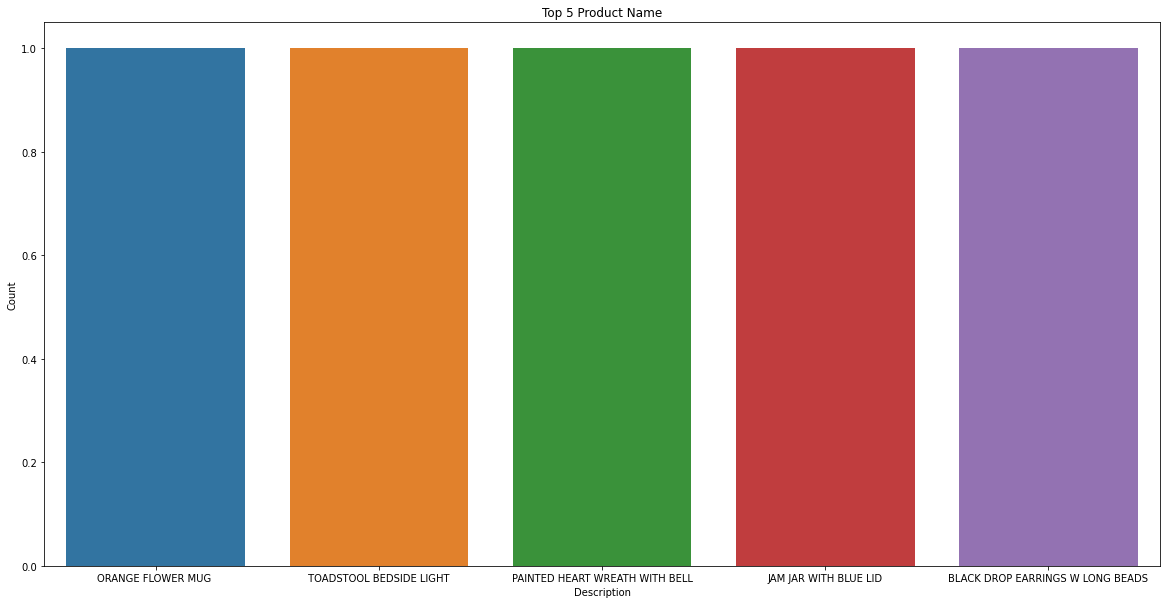

In [ ]:
# bottom 5
plt.figure(figsize=(20,10))
plt.title('Top 5 Product Name')
sns.barplot(x='Description',y='Count',data=Description_df[-5:])

We can observe that products such as WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT, are the most sold products in terms of count. Let us now find the top products in terms of quantities sold and see if there is any difference.

In [ ]:
# top selling products by quantity
product2=customer_df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)
product2

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
                                       ...  
SET/3 TALL GLASS CANDLE HOLDER PINK        1
LASER CUT MULTI STRAND NECKLACE            1
CRACKED GLAZE EARRINGS BROWN               1
DOLPHIN WINDMILL                           1
SET OF 3 PINK FLYING DUCKS                 1
Name: Quantity, Length: 3877, dtype: int64

In [ ]:
# top 5 selling products wrt quantity
print('The top 5 selling product wrt to quantity: ')
print('----------------------------------------------')
print(product2[:5])

The top 5 selling product wrt to quantity: 
----------------------------------------------
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
Name: Quantity, dtype: int64


In [ ]:
# bottom 5 selling products wrt quantity
print('The bottom 5 selling product wrt to quantity: ')
print('----------------------------------------------')
print(product2[-5:])

The bottom 5 selling product wrt to quantity: 
----------------------------------------------
Description
SET/3 TALL GLASS CANDLE HOLDER PINK    1
LASER CUT MULTI STRAND NECKLACE        1
CRACKED GLAZE EARRINGS BROWN           1
DOLPHIN WINDMILL                       1
SET OF 3 PINK FLYING DUCKS             1
Name: Quantity, dtype: int64


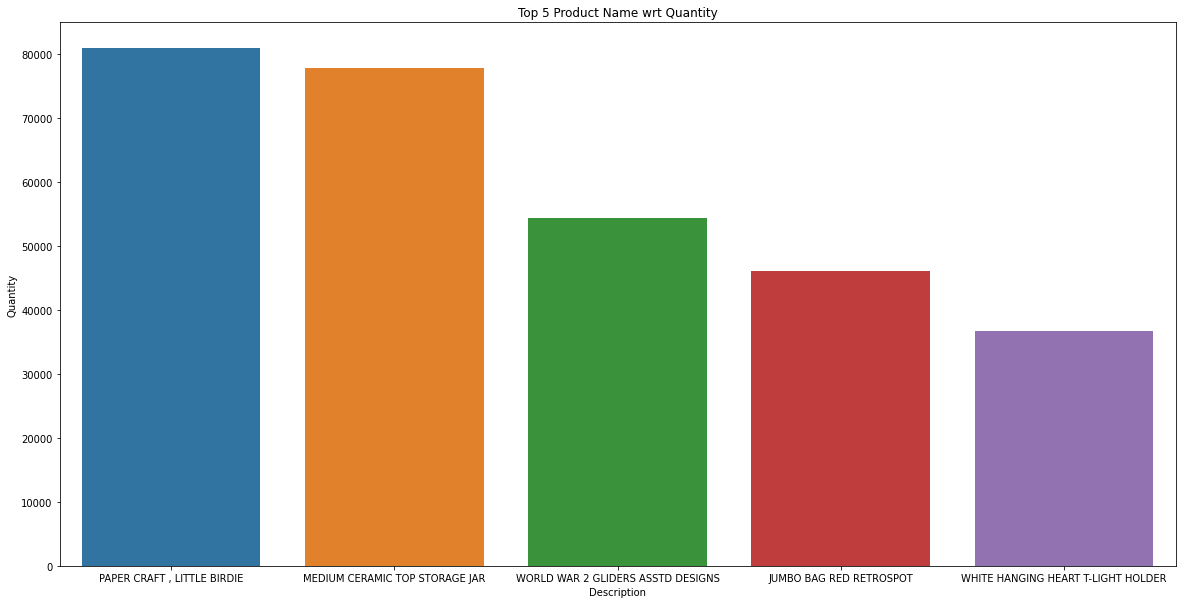

In [ ]:
# visualizing
Description_df=customer_df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
plt.title('Top 5 Product Name wrt Quantity')
sns.barplot(x='Description',y='Quantity',data=Description_df[:5])

We can see a difference in top products in terms of quantities sold. PAPER CRAFT , LITTLE BIRDIE, MEDIUM CERAMIC TOP STORAGE JAR, WORLD WAR 2 GLIDERS ASSTD DESIGNS are some of the top products sold.

In [ ]:
# finding max unit price
print('The maximum unit price of a product is = ',max(customer_df['UnitPrice']))

The maximum unit price of a product is =  8142.75


In [ ]:
# finding the most expensive product
customer_df['Description'][(customer_df['UnitPrice']==max(customer_df['UnitPrice']))]

118352    POSTAGE
Name: Description, dtype: object

The most expensive product is POSTAGE whose value is 8142.75

In [ ]:
# finding max unit price
print('The minimum unit price of a product is = ',min(customer_df['UnitPrice']))

The minimum unit price of a product is =  0.0


In [ ]:
# finding the most cheapest product
customer_df['Description'][(customer_df['UnitPrice']==min(customer_df['UnitPrice']))]

6914             ROUND CAKE TIN VINTAGE GREEN
22539            ADVENT CALENDAR GINGHAM SACK
25379                REGENCY CAKESTAND 3 TIER
29080                 PAPER BUNTING RETROSPOT
29082                  PLASTERS IN TIN SKULLS
34494           ORGANISER WOOD ANTIQUE WHITE 
53788            FAIRY CAKES NOTEBOOK A6 SIZE
85671     CERAMIC BOWL WITH LOVE HEART DESIGN
92875      MINI CAKE STAND  HANGING STRAWBERY
97430             HEART GARLAND RUSTIC PADDED
107192     CHILDS BREAKFAST SET CIRCUS PARADE
128641                          PARTY BUNTING
137127              SET OF 6 SOLDIER SKITTLES
194648             OVAL WALL MIRROR DIAMANTE 
197173               JAM MAKING SET WITH JARS
199711                                 Manual
208950             SET OF 6 NATIVITY MAGNETS 
223931       SET OF 2 CERAMIC PAINTED HEARTS 
223932    SET OF 2 CERAMIC CHRISTMAS REINDEER
223933               36 FOIL STAR CAKE CASES 
223934                     POLKADOT RAIN HAT 
256263             PADS TO MATCH A

There are various cheapest products whose value is 0. Maybe these products come as a complementary.

### **Quantity, Unit price and Total amount**

Let us now try to find the distribution of some numerical type variables such as unit price , quantity and total amount. This will tell us an overall range of values we have in these variables.

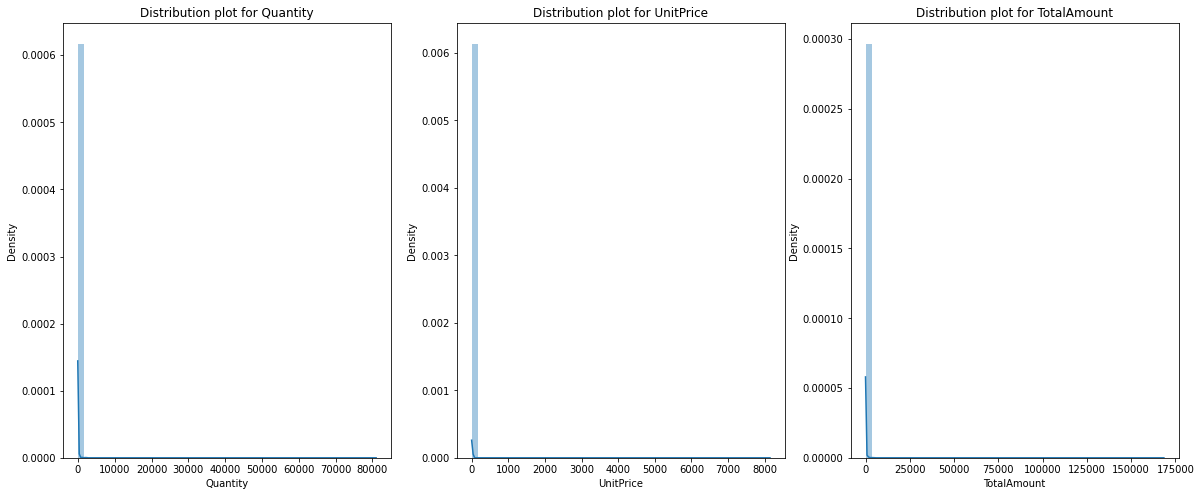

In [ ]:
# visualizing using distplots
list1=['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,8))
for index,item in enumerate(list1):
  plt.subplot(1,3,index+1)
  sns.distplot(customer_df[item])
  plt.title(f'Distribution plot for {item}')

We can observe that the data is highly positively skewed. We will apply log transform to get a better visualization.

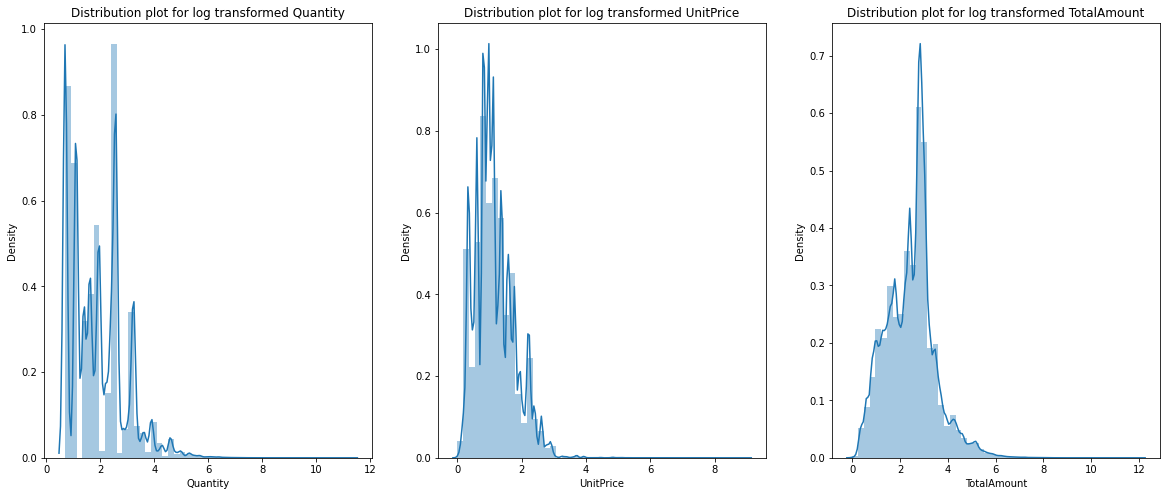

In [ ]:
# visualizing using distplots (log transformed)
list1=['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,8))
for index,item in enumerate(list1):
  plt.subplot(1,3,index+1)
  sns.distplot(np.log1p(customer_df[item]))
  plt.title(f'Distribution plot for log transformed {item}')

Now the graphs are somewhat reperesenting normal distribution.
The range of values have reduced to 1 - 12 with maximum values lying in the range 1 - 5.

### **Months**

Let us now see during which months the traffic is high.

In [ ]:
# finding count of orders for each month
month_df=customer_df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name','Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


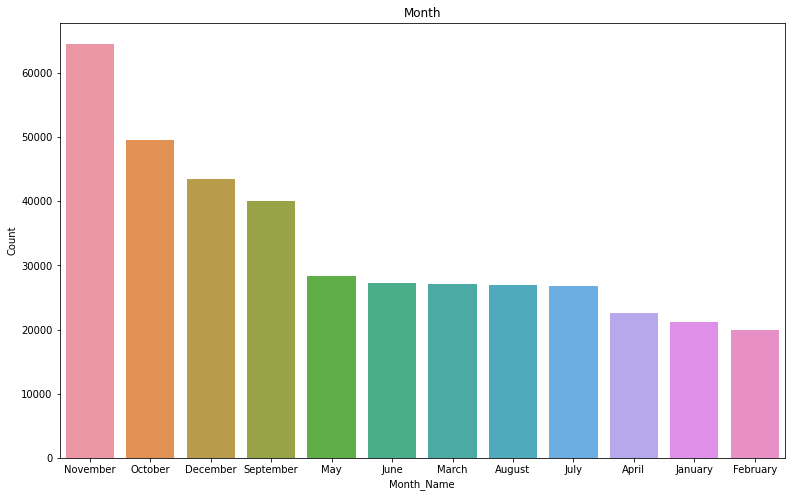

In [ ]:
# visualizing
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

We can observe that most orders were made during November, October, December, September and least in April, January, February.

### **Days**

Let us now try to find the days in which more customers buy the products.

In [ ]:
# finding count of orders for each day
day_df=customer_df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


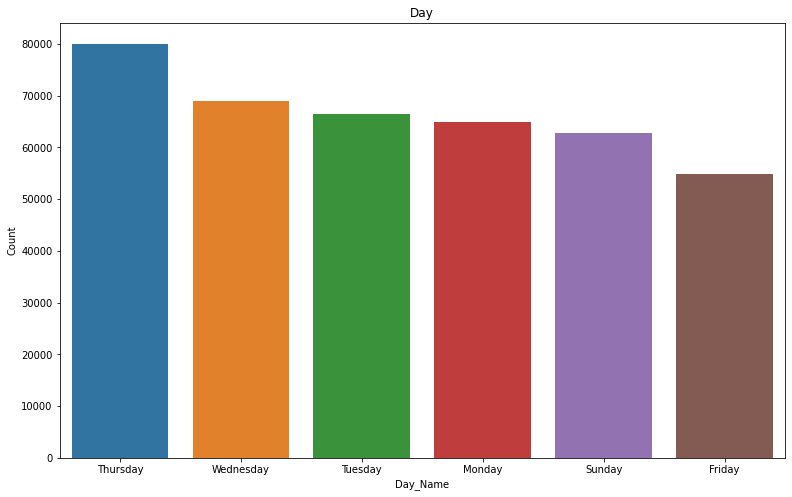

In [ ]:
# visualizing
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

Most of the orders came on Thursday, Wednesday and Tuesday.

### **Hours**

Let us now see, which hour of the day is most busiest hour.

In [ ]:
# finding count of orders for each hour
hour_df=customer_df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


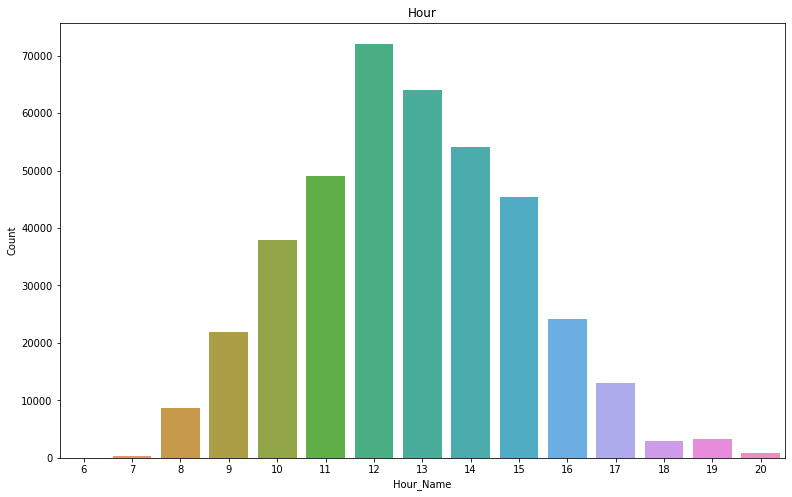

In [ ]:
# visualizing
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

We can observe that most customers have bought the product during the hours of 11 to 15.

### **Conclusions from EDA**

Now that we have done some analysis, let us point down the observations:

1. There are around 4339 customer ids in the dataset. 17841, 14911, 14096, 12748, 14606 Ids have done the most no. of purchages.


2. Maximum no. of customers belong to United Kingdom.

3.  WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the top most selling products countwise.

4. PAPER CRAFT , LITTLE BIRDIE, MEDIUM CERAMIC TOP STORAGE JAR, WORLD WAR 2 GLIDERS ASSTD DESIGNS are some of the top selling products quantitywise.

5. The most expensive product is POSTAGE.

6. UnitPrice, Quantity and Total amount are highly positively skewed.

7. Most purchages have been made in the months of November, October, and Descember.

8. Most purchages have been made on Thursdays, Wednesdays and Tuesdays.

9. Most purchages were made during afternoon hours.

Great! Now that we have understood about the features let us try to formulate some quantitative variables that will help us to segment the customers.

# **3. Creating RFM model**